<a href="https://colab.research.google.com/github/arijitar/Machine-Learning/blob/main/Copy_of_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()
# print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# One hot encode
df = pd.get_dummies(df, columns=['Geography', 'Gender'],drop_first=True)

In [ ]:
df = df.replace({True:1, False: 0})

<ipython-input-84-47ded7a09f2b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1, False: 0})


In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(11,activation = 'relu', input_dim = 11))
model.add(Dense(11,activation = 'relu', input_dim = 11))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=80, validation_split=0.2)

Epoch 1/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8672 - loss: 0.3181 - val_accuracy: 0.8537 - val_loss: 0.3468
Epoch 2/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8709 - loss: 0.3073 - val_accuracy: 0.8544 - val_loss: 0.3488
Epoch 3/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8688 - loss: 0.3159 - val_accuracy: 0.8537 - val_loss: 0.3449
Epoch 4/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8713 - loss: 0.3008 - val_accuracy: 0.8500 - val_loss: 0.3466
Epoch 5/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.3078 - val_accuracy: 0.8525 - val_loss: 0.3474
Epoch 6/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8652 - loss: 0.3181 - val_accuracy: 0.8531 - val_loss: 0.3480
Epoch 7/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8622 - loss: 0.3262 - val_accuracy: 0.8562 - val_loss: 0.3469
Epoch 8/80
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8634 - loss: 0.3237 - val_accuracy: 0

In [ ]:
model.layers[0].get_weights()

[array([[ 0.0618876 ,  0.5396753 , -0.2536809 ,  0.59527236, -0.46338472,
          0.12077159,  0.27426505, -0.41566208,  0.29288593, -0.01686987,
         -0.35046697],
        [ 0.04342102, -0.03120571, -0.12781852, -0.49348626,  0.24938636,
          0.33765456,  1.5116153 , -0.92046905, -0.9596193 ,  0.40262616,
          0.7805466 ],
        [ 0.14215583, -0.76952004,  0.01840236, -0.17905603, -0.13724776,
          0.59844464, -0.04945649,  0.22013846, -0.07258137,  0.00284772,
          0.420651  ],
        [ 0.46455857, -0.40415043,  0.6599355 , -1.2746259 ,  0.8696826 ,
         -0.18715633, -0.3446865 , -0.68323654,  0.3020161 ,  0.16897532,
          0.420312  ],
        [ 1.0003003 ,  0.8536941 , -0.14239399, -1.0495405 ,  0.5552525 ,
          0.86414915, -0.03172399,  0.12581995, -0.0971645 , -1.0554736 ,
         -0.07440645],
        [-0.0905824 ,  0.32622877, -0.11391683, -0.2809477 ,  0.12037111,
         -0.1749377 , -0.0817319 ,  0.17829254, -0.14018326, -0.0573801

In [ ]:
model.layers[1].get_weights()

[array([[ 1.0907735 , -0.19391263, -0.55944425, -0.73304665,  0.56208754,
          0.25253332,  0.3835309 , -0.5485512 ,  0.22123398, -0.02382707,
         -0.403936  ],
        [ 0.44951287,  0.7045644 ,  0.16676025,  0.47929224, -0.14941882,
         -0.45342565,  0.29785287,  0.2352685 ,  0.75234723,  0.5650163 ,
          0.08981436],
        [ 0.02935023,  0.45212457, -0.06146405,  0.01800179, -0.4232687 ,
          0.10859248, -0.8275995 ,  0.17926104, -0.62923414, -1.6420825 ,
         -0.94215846],
        [ 0.79085135,  0.3804959 ,  0.4102613 , -0.19848736,  0.46954203,
          0.12075929,  0.21166773,  0.21256022, -2.1017904 , -0.17722896,
         -0.15867124],
        [ 0.12936175, -1.4780148 , -0.05749939, -0.2315347 , -0.2392625 ,
          0.5567879 , -0.23415175, -0.00476986,  0.18983206,  0.7150966 ,
         -0.4256579 ],
        [ 0.3031396 ,  0.5612464 ,  0.2908511 ,  0.62339544, -0.1563932 ,
         -0.7122379 ,  0.40712225,  0.11949624,  0.16426794, -0.7465128

In [ ]:
model.layers[2].get_weights()

[array([[ 1.2669375 ],
        [-0.84775025],
        [-0.13906209],
        [-0.6341681 ],
        [-1.227075  ],
        [-0.31847292],
        [ 0.39527687],
        [-1.1642334 ],
        [ 1.3047906 ],
        [-1.1869127 ],
        [-0.937666  ]], dtype=float32),
 array([0.20787407], dtype=float32)]

In [ ]:
y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.01425081],
       [0.10657757],
       [0.16489588],
       ...,
       [0.01002171],
       [0.01317861],
       [0.38913277]], dtype=float32)

In [ ]:
y_pred = np.where(y_log >0.5, 1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8625

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history.history

{'accuracy': [0.8695312738418579,
  0.8700000047683716,
  0.8695312738418579,
  0.8676562309265137,
  0.8693749904632568,
  0.8685937523841858,
  0.8696874976158142,
  0.8695312738418579,
  0.8695312738418579,
  0.8695312738418579,
  0.8700000047683716,
  0.8681250214576721,
  0.8693749904632568,
  0.867968738079071,
  0.8690624833106995,
  0.8720312714576721,
  0.8690624833106995,
  0.8690624833106995,
  0.8695312738418579,
  0.8687499761581421,
  0.867968738079071,
  0.8693749904632568,
  0.8690624833106995,
  0.8701562285423279,
  0.8687499761581421,
  0.8698437213897705,
  0.870312511920929,
  0.8706250190734863,
  0.8712499737739563,
  0.8692187666893005,
  0.870312511920929,
  0.8695312738418579,
  0.870312511920929,
  0.8706250190734863,
  0.8700000047683716,
  0.8689062595367432,
  0.8681250214576721,
  0.8687499761581421,
  0.8696874976158142,
  0.8709375262260437,
  0.8690624833106995,
  0.8689062595367432,
  0.8698437213897705,
  0.8700000047683716,
  0.8717187643051147,
  0

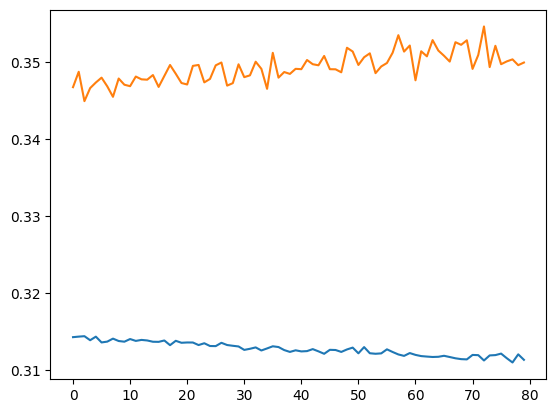

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

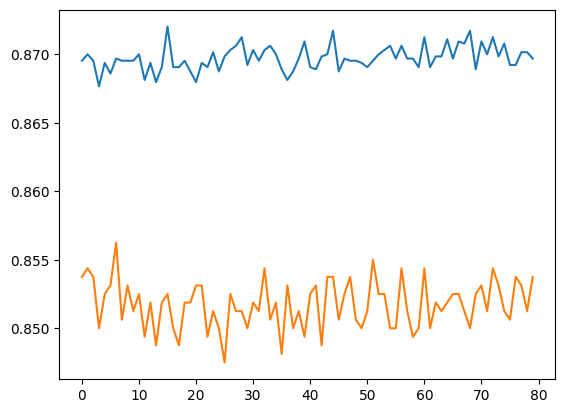

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()